In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import string
import warnings
warnings.filterwarnings('ignore')
import librosa
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

Text(0.5, 1.0, 'Tweets distribution by cyberbullying types')

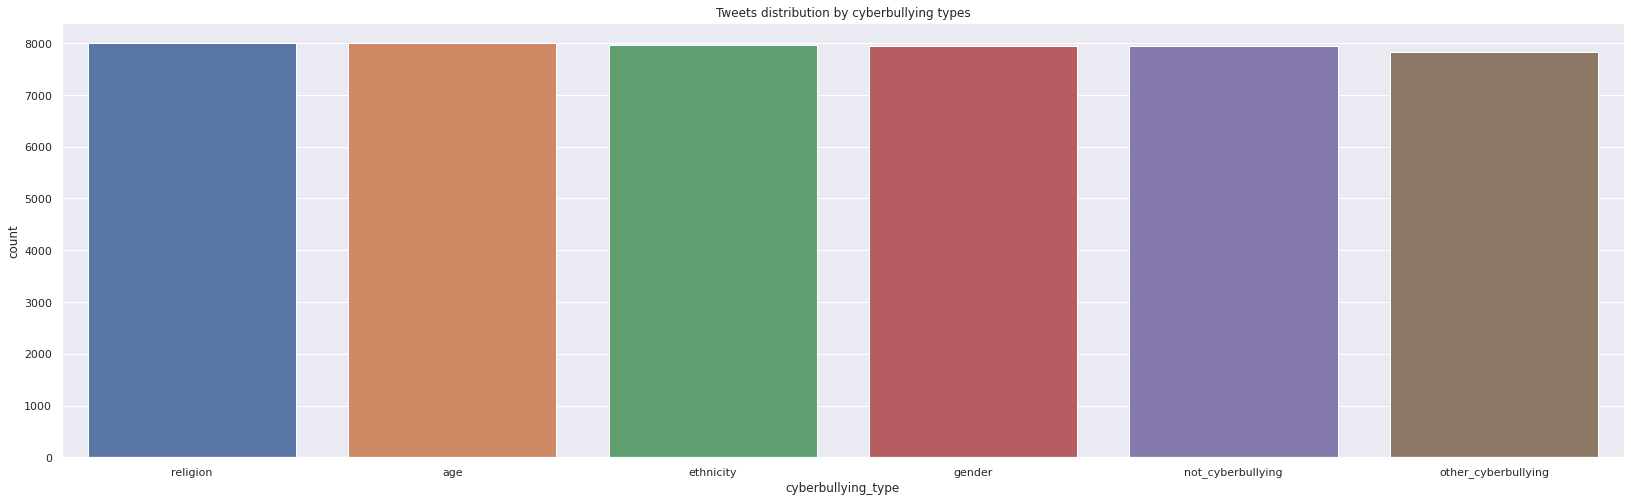

In [2]:
df = pd.read_csv("categorical_data.csv")
df = df.drop_duplicates()
sns.set(rc={'figure.figsize':(28,8)})
sns.countplot(x="cyberbullying_type", data=df, order=df.cyberbullying_type.value_counts().index).set_title("Tweets distribution by cyberbullying types")

Text(0.5, 1.0, 'Tweets distribution by cyberbullying types')

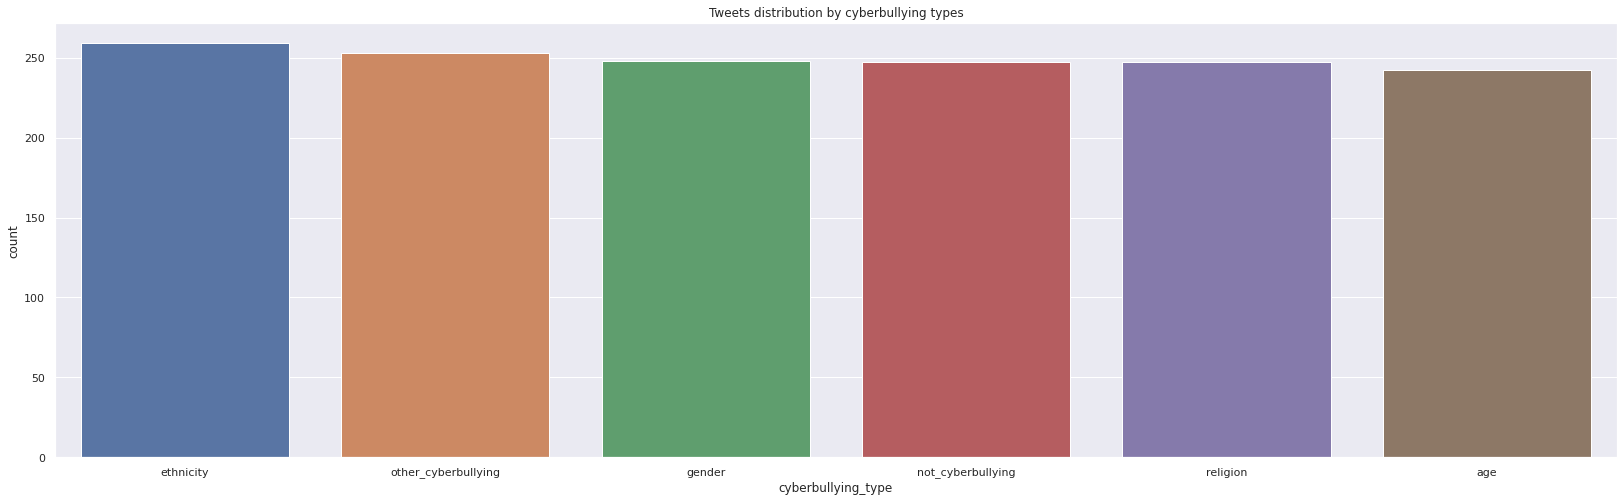

In [3]:
classes=list(df["cyberbullying_type"].unique())
df_list=[]

flux=700-800+800
for i in range(len(classes)):
    sub_df=df[df["cyberbullying_type"]==classes[i]]
    #drop first 7000 rows of sub_df
    if (classes[i]=="other_cyberbullying"):
        sub_df=sub_df.drop(sub_df.index[:6870+flux])
    elif (classes[i]=="religion"):
        sub_df=sub_df.drop(sub_df.index[:7050+flux])
    elif (classes[i]=="age"):
        sub_df=sub_df.drop(sub_df.index[:7050+flux]) 
    elif (classes[i]=="not_cyberbullying"):
        sub_df=sub_df.drop(sub_df.index[:7000+flux-10])     
    else:
        sub_df=sub_df.drop(sub_df.index[:7000+flux])
    df_list.append(sub_df)


#concatenate all sub_df
df_dropped=pd.concat(df_list,ignore_index=True)
df_drop=df_dropped.reset_index()


df = df_drop
sns.set(rc={'figure.figsize':(28,8)})
sns.countplot(x="cyberbullying_type", data=df, order=df.cyberbullying_type.value_counts().index).set_title("Tweets distribution by cyberbullying types")

In [4]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [5]:
def initial_cleaning(text):
    text = re.sub(r"^RT[\s]+","",text)
    text = text.lower()
    text = re.sub(r"https?:\/\/.*[\r\n]*","https",text)
    text = re.sub(r"@[A-Za-z0-9]+","",text)
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002700-\U000027BF"  # Dingbats
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U00002600-\U000026FF"  # Miscellaneous Symbols
        u"\U0001F300-\U0001F5FF"  # Miscellaneous Symbols And Pictographs
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U0001F680-\U0001F6FF"  # Transport and Map Symbols
                           "]+", flags=re.UNICODE)

    text=emoji_pattern.sub(r'', text)
    text = re.sub(r'[0-9]',' ',text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    return text

def remove_stopword(text):
    a = [i for i in text.split() if i not in stopwords.words('english')]
    return ' '.join(a)

porter = PorterStemmer()
def stem(text):
    a = [porter.stem(i) for i in text.split()]
    return ' '.join(a)

porter = PorterStemmer()
def stem(text):
    a = [porter.stem(i) for i in text.split()]
    return ' '.join(a)

wl = WordNetLemmatizer()
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

tokenizer = TweetTokenizer(preserve_case=False, 
                           strip_handles=True,
                           reduce_len=True)
def lemmatizer(text):
    word_pos_tags = nltk.pos_tag(tokenizer.tokenize(text))
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)]
    return " ".join(a)



def text_preprocessing(text):
    return lemmatizer(stem(remove_stopword(initial_cleaning(text))))

df["original_tweet"] = df.tweet_text
df.tweet_text = df.tweet_text.apply(lambda x: text_preprocessing(x))
df

,index,tweet_text,cyberbullying_type,original_tweet
0,0,fuck fuck mu ch lili allen late video racist a...,not_cyberbullying,"Fuck you, fuck you very very mu~ch, Lily Allen..."
1,1,sinc give fuck scienc go sell advertis cosmet ...,not_cyberbullying,Since when did @Mamamia give a fuck about scie...
2,2,mean bottom heart go fuck,not_cyberbullying,@PeerWorker I mean this from the bottom of my ...
3,3,good morn,not_cyberbullying,Good morning @Carmeldip
4,4,sudden death anni lloyd mayb buy bbq practic n...,not_cyberbullying,"Sudden death for Annie and Lloyd, maybe they w..."
...,...,...,...,...
1491,1491,black ppl expect anyth depend anyth yet free p...,ethnicity,"Black ppl aren't expected to do anything, depe..."
1492,1492,turner withhold disappoint turner call court “...,ethnicity,Turner did not withhold his disappointment. Tu...
1493,1493,swear god dumb nigger bitch get bleach hair re...,ethnicity,I swear to God. This dumb nigger bitch. I have...
1494,1494,yea fuck rt your nigger fuck unfollow fuck dum...,ethnicity,Yea fuck you RT @therealexel: IF YOURE A NIGGE...


In [6]:
from nltk.util import ngrams
text_list=df["tweet_text"].tolist()
omega_text_words = []
n=1


for i in range(len(text_list)):
    sentence=text_list[i]
    unigrams = ngrams(sentence.split(), n)
    flat_list = [item for sublist in [list(a) for a in unigrams] for item in sublist]
    omega_text_words.append(flat_list)

In [7]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 4.8 MB/s 
     |████████████████████████████████| 5.3 MB 9.0 MB/s 
     |████████████████████████████████| 1.3 MB 48.3 MB/s 
     |████████████████████████████████| 163 kB 75.9 MB/s 
     |████████████████████████████████| 7.6 MB 60.0 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=dbfd4fe1db2f6d237714790290b18ba76f2bf3ac34364c28401eb6bc2bdfd1fc
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [8]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [9]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
labels=np.array(df["cyberbullying_type"].tolist())
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
mapping = dict(zip(label_encoder.classes_, onehot_encoder.transform(label_encoder.transform(label_encoder.classes_).reshape(6, 1))))
for key,value in mapping.items():
    print("",key," ----------------------------- ",value)

 age  -----------------------------  [1. 0. 0. 0. 0. 0.]
 ethnicity  -----------------------------  [0. 1. 0. 0. 0. 0.]
 gender  -----------------------------  [0. 0. 1. 0. 0. 0.]
 not_cyberbullying  -----------------------------  [0. 0. 0. 1. 0. 0.]
 other_cyberbullying  -----------------------------  [0. 0. 0. 0. 1. 0.]
 religion  -----------------------------  [0. 0. 0. 0. 0. 1.]


In [10]:
from numpy import dot
from numpy.linalg import norm


#Our sentences we like to encode
sentences = text_list
#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)


In [11]:
from numpy.random.mtrand import random
from sklearn.utils import shuffle
sentences,text_list,embeddings,integer_encoded,onehot_encoded=shuffle(sentences,text_list,embeddings,integer_encoded,onehot_encoded,random_state=0)

In [12]:
#construct over adjency matrix
from sklearn.metrics.pairwise import cosine_similarity
A=cosine_similarity(embeddings, embeddings)
thresh=0.5
for i in range(A.shape[0]):
  for j in range(A.shape[1]):
      if A[i,j]<thresh:
        A[i,j]=0

source=[]
target=[]
for i in range(len(sentences)):
    for j in range(len(sentences)):
        if A[i,j]==1:
            source.append(i)
            target.append(j)


Edges=np.hstack((np.array(source).reshape(-1,1),np.array(target).reshape(-1,1)))
Node_features=embeddings
Node_labels=integer_encoded


record=np.arange(len(sentences))
random_indices = np.random.permutation(range(len(sentences)))

# 50/50 split
train_indices = record[random_indices[: len(random_indices) // 2]]
test_indices = record[random_indices[len(random_indices) // 2 :]]



# Obtain ground truth labels corresponding to each paper_id
train_labels = Node_labels[random_indices[: len(random_indices) // 2]]
test_labels = Node_labels[random_indices[len(random_indices) // 2 :]]

In [13]:
!pip install stellargraph==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 433 kB 10.7 MB/s 


In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import os
import warnings


class GraphAttention(layers.Layer):
    def __init__(
        self,
        units,
        kernel_initializer="glorot_uniform",
        kernel_regularizer=None,
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.units = units
        self.kernel_initializer = keras.initializers.get(kernel_initializer)
        self.kernel_regularizer = keras.regularizers.get(kernel_regularizer)

    def build(self, input_shape):

        self.kernel = self.add_weight(
            shape=(input_shape[0][-1], self.units),
            trainable=True,
            initializer=self.kernel_initializer,
            regularizer=self.kernel_regularizer,
            name="kernel",
        )
        self.kernel_attention = self.add_weight(
            shape=(self.units * 2, 1),
            trainable=True,
            initializer=self.kernel_initializer,
            regularizer=self.kernel_regularizer,
            name="kernel_attention",
        )
        self.built = True

    def call(self, inputs):
        node_states, edges = inputs

        # Linearly transform node states
        node_states_transformed = tf.matmul(node_states, self.kernel)

        # (1) Compute pair-wise attention scores
        node_states_expanded = tf.gather(node_states_transformed, edges)
        node_states_expanded = tf.reshape(
            node_states_expanded, (tf.shape(edges)[0], -1)
        )
        attention_scores = tf.nn.leaky_relu(
            tf.matmul(node_states_expanded, self.kernel_attention)
        )
        attention_scores = tf.squeeze(attention_scores, -1)

        # (2) Normalize attention scores
        attention_scores = tf.math.exp(tf.clip_by_value(attention_scores, -2, 2))
        attention_scores_sum = tf.math.unsorted_segment_sum(
            data=attention_scores,
            segment_ids=edges[:, 0],
            num_segments=tf.reduce_max(edges[:, 0]) + 1,
        )
        attention_scores_sum = tf.repeat(
            attention_scores_sum, tf.math.bincount(tf.cast(edges[:, 0], "int32"))
        )
        attention_scores_norm = attention_scores / attention_scores_sum

        # (3) Gather node states of neighbors, apply attention scores and aggregate
        node_states_neighbors = tf.gather(node_states_transformed, edges[:, 1])
        out = tf.math.unsorted_segment_sum(
            data=node_states_neighbors * attention_scores_norm[:, tf.newaxis],
            segment_ids=edges[:, 0],
            num_segments=tf.shape(node_states)[0],
        )
        return out


class MultiHeadGraphAttention(layers.Layer):
    def __init__(self, units, num_heads=4, merge_type="concat", **kwargs):
        super().__init__(**kwargs)
        self.num_heads = num_heads
        self.merge_type = merge_type
        self.attention_layers = [GraphAttention(units) for _ in range(num_heads)]

    def call(self, inputs):
        atom_features, pair_indices = inputs

        # Obtain outputs from each attention head
        outputs = [
            attention_layer([atom_features, pair_indices])
            for attention_layer in self.attention_layers
        ]
        # Concatenate or average the node states from each head
        if self.merge_type == "concat":
            outputs = tf.concat(outputs, axis=-1)
        else:
            outputs = tf.reduce_mean(tf.stack(outputs, axis=-1), axis=-1)
        # Activate and return node states
        return tf.nn.relu(outputs)


class GraphAttentionNetwork(keras.Model):
    def __init__(
        self,
        node_states,
        edges,
        hidden_units,
        num_heads,
        num_layers,
        output_dim,
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.node_states = node_states
        self.edges = edges
        self.preprocess = layers.Dense(hidden_units * num_heads, activation="relu")
        self.attention_layers = [
            MultiHeadGraphAttention(hidden_units, num_heads) for _ in range(num_layers)
        ]
        self.output_layer = layers.Dense(output_dim)

    def call(self, inputs):
        node_states, edges = inputs
        x = self.preprocess(node_states)
        for attention_layer in self.attention_layers:
            x = attention_layer([x, edges]) + x
        outputs = self.output_layer(x)
        return outputs

    def train_step(self, data):
        indices, labels = data

        with tf.GradientTape() as tape:
            # Forward pass
            outputs = self([self.node_states, self.edges])
            # Compute loss
            loss = self.compiled_loss(labels, tf.gather(outputs, indices))
        # Compute gradients
        grads = tape.gradient(loss, self.trainable_weights)
        # Apply gradients (update weights)
        optimizer.apply_gradients(zip(grads, self.trainable_weights))
        # Update metric(s)
        self.compiled_metrics.update_state(labels, tf.gather(outputs, indices))

        return {m.name: m.result() for m in self.metrics}

    def predict_step(self, data):
        indices = data
        # Forward pass
        outputs = self([self.node_states, self.edges])
        # Compute probabilities
        return tf.nn.softmax(tf.gather(outputs, indices))

    def test_step(self, data):
        indices, labels = data
        # Forward pass
        outputs = self([self.node_states, self.edges])
        # Compute loss
        loss = self.compiled_loss(labels, tf.gather(outputs, indices))
        # Update metric(s)
        self.compiled_metrics.update_state(labels, tf.gather(outputs, indices))

        return {m.name: m.result() for m in self.metrics}


In [15]:
# Define hyper-parameters
HIDDEN_UNITS = 100
NUM_HEADS = 16
NUM_LAYERS = 3
OUTPUT_DIM = 6
NUM_EPOCHS=50
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.1
LEARNING_RATE = 1e-3
MOMENTUM = 0.9

loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.Adam(LEARNING_RATE)
accuracy_fn = keras.metrics.SparseCategoricalAccuracy(name="acc")
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_acc", min_delta=1e-5, patience=5, restore_best_weights=True
)

# Build model
gat_model = GraphAttentionNetwork(
    Node_features, Edges, HIDDEN_UNITS, NUM_HEADS, NUM_LAYERS, OUTPUT_DIM
)

# Compile model
gat_model.compile(loss=loss_fn, optimizer=optimizer, metrics=[accuracy_fn])

gat_model.fit(
    x=train_indices,
    y=train_labels,
    validation_split=VALIDATION_SPLIT,
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    # callbacks=[early_stopping],
    verbose=2,
)

_, test_accuracy = gat_model.evaluate(x=test_indices, y=test_labels, verbose=0)

print("--" * 38 + f"\nTest Accuracy {test_accuracy*100:.1f}%")


Epoch 1/50
22/22 - 40s - loss: 1.4808 - acc: 0.5572 - val_loss: 1.2579 - val_acc: 0.7067 - 40s/epoch - 2s/step
Epoch 2/50
22/22 - 1s - loss: 0.9103 - acc: 0.7949 - val_loss: 1.0459 - val_acc: 0.7067 - 829ms/epoch - 38ms/step
Epoch 3/50
22/22 - 1s - loss: 0.6449 - acc: 0.8336 - val_loss: 0.9450 - val_acc: 0.7200 - 743ms/epoch - 34ms/step
Epoch 4/50
22/22 - 1s - loss: 0.4997 - acc: 0.8722 - val_loss: 0.8163 - val_acc: 0.7200 - 750ms/epoch - 34ms/step
Epoch 5/50
22/22 - 1s - loss: 0.4064 - acc: 0.8945 - val_loss: 0.8417 - val_acc: 0.7467 - 760ms/epoch - 35ms/step
Epoch 6/50
22/22 - 1s - loss: 0.3706 - acc: 0.9049 - val_loss: 0.9035 - val_acc: 0.7467 - 761ms/epoch - 35ms/step
Epoch 7/50
22/22 - 1s - loss: 0.3319 - acc: 0.9212 - val_loss: 0.7903 - val_acc: 0.7467 - 755ms/epoch - 34ms/step
Epoch 8/50
22/22 - 1s - loss: 0.2705 - acc: 0.9346 - val_loss: 0.8237 - val_acc: 0.7733 - 754ms/epoch - 34ms/step
Epoch 9/50
22/22 - 1s - loss: 0.2381 - acc: 0.9495 - val_loss: 0.6813 - val_acc: 0.7467 - 7

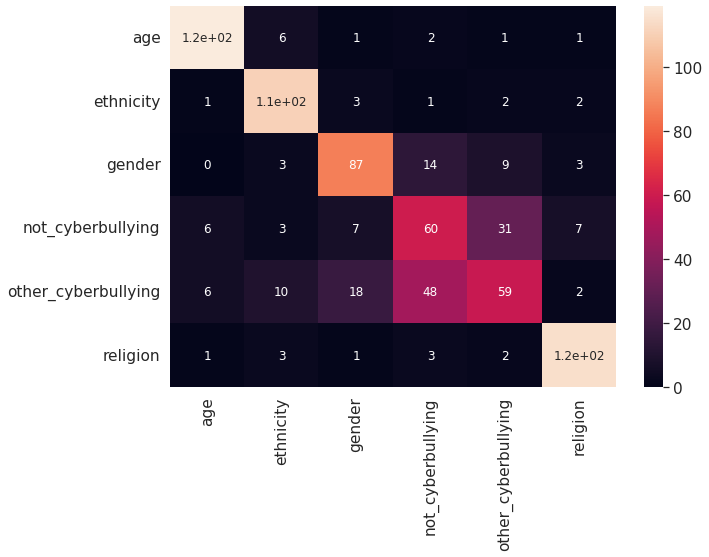

In [16]:
ref=test_labels
predictions=np.argmax(gat_model.predict(x=test_indices, verbose=0),axis=1)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ref,predictions)



label_names=[]
for key,_ in mapping.items():
    label_names.append(key)

    
#plot confusion matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cm, label_names,label_names)
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size

In [17]:
from sklearn.metrics import classification_report

print(classification_report(ref, predictions,digits=4))

              precision    recall  f1-score   support

           0     0.8947    0.9154    0.9049       130
           1     0.8162    0.9250    0.8672       120
           2     0.7436    0.7500    0.7468       116
           3     0.4688    0.5263    0.4959       114
           4     0.5673    0.4126    0.4777       143
           5     0.8846    0.9200    0.9020       125

    accuracy                         0.7366       748
   macro avg     0.7292    0.7415    0.7324       748
weighted avg     0.7295    0.7366    0.7298       748

